In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
artworks = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/museum-collection-dataset/artworks.csv')

In [3]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
Artwork ID            130262 non-null int64
Title                 130210 non-null object
Artist ID             128802 non-null object
Name                  128802 non-null object
Date                  127950 non-null object
Medium                118343 non-null object
Dimensions            118799 non-null object
Acquisition Date      124799 non-null object
Credit                127192 non-null object
Catalogue             130262 non-null object
Department            130262 non-null object
Classification        130262 non-null object
Object Number         130262 non-null object
Diameter (cm)         1399 non-null float64
Circumference (cm)    10 non-null float64
Height (cm)           111893 non-null float64
Length (cm)           736 non-null float64
Width (cm)            111003 non-null float64
Depth (cm)            11443 non-null float64
Weight (kg)           298 non-null floa

In [4]:
pd.set_option('display.max_columns' , 21)
artworks.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,Department,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,Architecture & Design,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,Architecture & Design,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,Architecture & Design,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


The column names from this data looked different from the one we saw in the illustration example.May be it has been updated since it was last used for the course matterial.

Therefore i have used my own data cleaning feature engineering techniques to come up with the final model input data.

In [5]:
artworks.nunique()

Artwork ID            130262
Title                  94882
Artist ID              13575
Name                   13530
Date                    9373
Medium                 19348
Dimensions             78464
Acquisition Date        1876
Credit                  7030
Catalogue                  2
Department                 9
Classification            28
Object Number         130262
Diameter (cm)            494
Circumference (cm)         9
Height (cm)             3711
Length (cm)              388
Width (cm)              3744
Depth (cm)              1333
Weight (kg)              200
Duration (s)             774
dtype: int64

By analysing the number of missing values and intuition lets include or exclude columns to our important features.

In [6]:
artworks = artworks[['Date','Medium','Credit'
                     ,'Catalogue','Department','Height (cm)','Width (cm)']]

Lets do some univariate analysis to help us build a robust hot-encoding to some of the variables for sensible model creation.

In [7]:
indices = []
for i in artworks['Medium'].value_counts().index:
    if artworks['Medium'].value_counts()[i] > 300:
        indices.append(i)

In [8]:
len(indices)

36

Therefore i decided to use 'Mediums' with their usage frequency more than 300.Those with less than three hundred are less popular mediums therefore decided to ignore them for now.But first let us see the the distribution of the the frequency of unique Medium using seaborn's 'kde' plot.

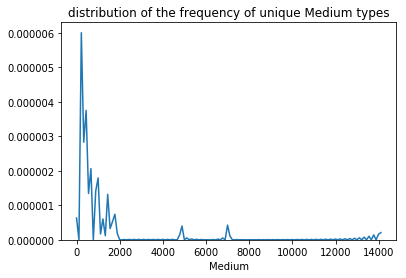

In [9]:
sns.distplot(artworks['Medium'].value_counts(), hist = False)
plt.title('distribution of the frequency of unique Medium types');

In [10]:
indices_credit = []
for i in artworks['Credit'].value_counts().index:
    if artworks['Credit'].value_counts()[i] > 300:
        indices_credit.append(i)

In [11]:
len(indices_credit)

53

In [12]:
artworks = artworks[(artworks.Medium.isin(indices)) | (artworks.Credit.isin(indices_credit))]

In [13]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95873 entries, 30 to 130261
Data columns (total 7 columns):
Date           93901 non-null object
Medium         86901 non-null object
Credit         94684 non-null object
Catalogue      95873 non-null object
Department     95873 non-null object
Height (cm)    82332 non-null float64
Width (cm)     82019 non-null float64
dtypes: float64(2), object(5)
memory usage: 5.9+ MB


In [14]:
for col_name in ['Date', 'Medium', 'Credit']:
    artworks[col_name] = artworks[col_name].fillna('Unknown')

In [15]:
# for col_num in ['Height (cm)', 'Width (cm)']:
#     artworks = artworks[col_num].fillna(artworks[col_num].median())
artworks['Height (cm)'] = pd.to_numeric(artworks['Height (cm)'], errors='coerce')
artworks['Height (cm)'] = artworks['Height (cm)'].fillna(artworks['Height (cm)'].median())

In [16]:
artworks['Width (cm)'] = pd.to_numeric(artworks['Width (cm)'], errors='coerce')
artworks['Width (cm)'] = artworks['Width (cm)'].fillna(artworks['Width (cm)'].median())

In [17]:
# Date = pd.get_dummies(artworks['Date'])
Medium = pd.get_dummies(artworks.Medium)
Credit = pd.get_dummies(artworks.Credit)
Catalogue = pd.get_dummies(artworks.Catalogue)

In [18]:
X = artworks[['Height (cm)', 'Width (cm)']]

In [19]:
# X = pd.concat([X, Date, Medium, Credit, Catalogue], 1)
X = pd.concat([X, Medium, Credit, Catalogue], 1)
Y = artworks.Department

In [20]:
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
# mlp.fit(X, Y)

In [21]:
# mlp.score(X, Y)
#The score was .98

Although it require us further investigation to confirm,i suspected overfitting because of its high accuracy and high dimension.And because of its high dimension the computational time was also very long.Therefore i decided to remove the Date column from our feature dataset for speed purpose.

In [22]:
mlp.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
mlp.score(X, Y)

0.9892148988766389

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

Even if i discarded the variables causing high dimensionality in the training data, The SKLearn cross_val_score function took very long time to successfully run in my machine i.e over 5 hrs until interupted by me.This shows that how memory intensive the SKLearn Multi-Layer Perceptrol model is.